In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from keras.models import Sequential
from keras.layers import Dense,LSTM
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv(r'C:/Users/yaman/OneDrive/Documents/SET Conference/Datasets/ApplePrice.csv')

In [3]:
data

,Date,Price,Open,High,Low,Volume (in M),Chg%
0,"Jan 03, 2007",2.99,3.08,3.09,2.92,1.25,-1.32
1,"Jan 04, 2007",3.06,3.00,3.07,2.99,856.13,2.34
2,"Jan 05, 2007",3.04,3.06,3.08,3.01,835.40,-0.65
3,"Jan 08, 2007",3.05,3.07,3.09,3.05,797.73,0.33
4,"Jan 09, 2007",3.31,3.09,3.32,3.04,3.35,8.52
...,...,...,...,...,...,...,...
4024,"Dec 23, 2022",131.86,130.92,132.41,129.64,63.82,-0.28
4025,"Dec 27, 2022",130.03,131.38,131.41,128.72,68.75,-1.39
4026,"Dec 28, 2022",126.04,129.67,131.03,125.87,84.90,-3.07
4027,"Dec 29, 2022",129.61,127.99,130.48,127.73,75.48,2.83


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4029 entries, 0 to 4028
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           4029 non-null   object 
 1   Price          4029 non-null   float64
 2   Open           4029 non-null   float64
 3   High           4029 non-null   float64
 4   Low            4029 non-null   float64
 5   Volume (in M)  4029 non-null   float64
 6   Chg%           4029 non-null   float64
dtypes: float64(6), object(1)
memory usage: 220.5+ KB


In [5]:
data.shape

(4029, 7)

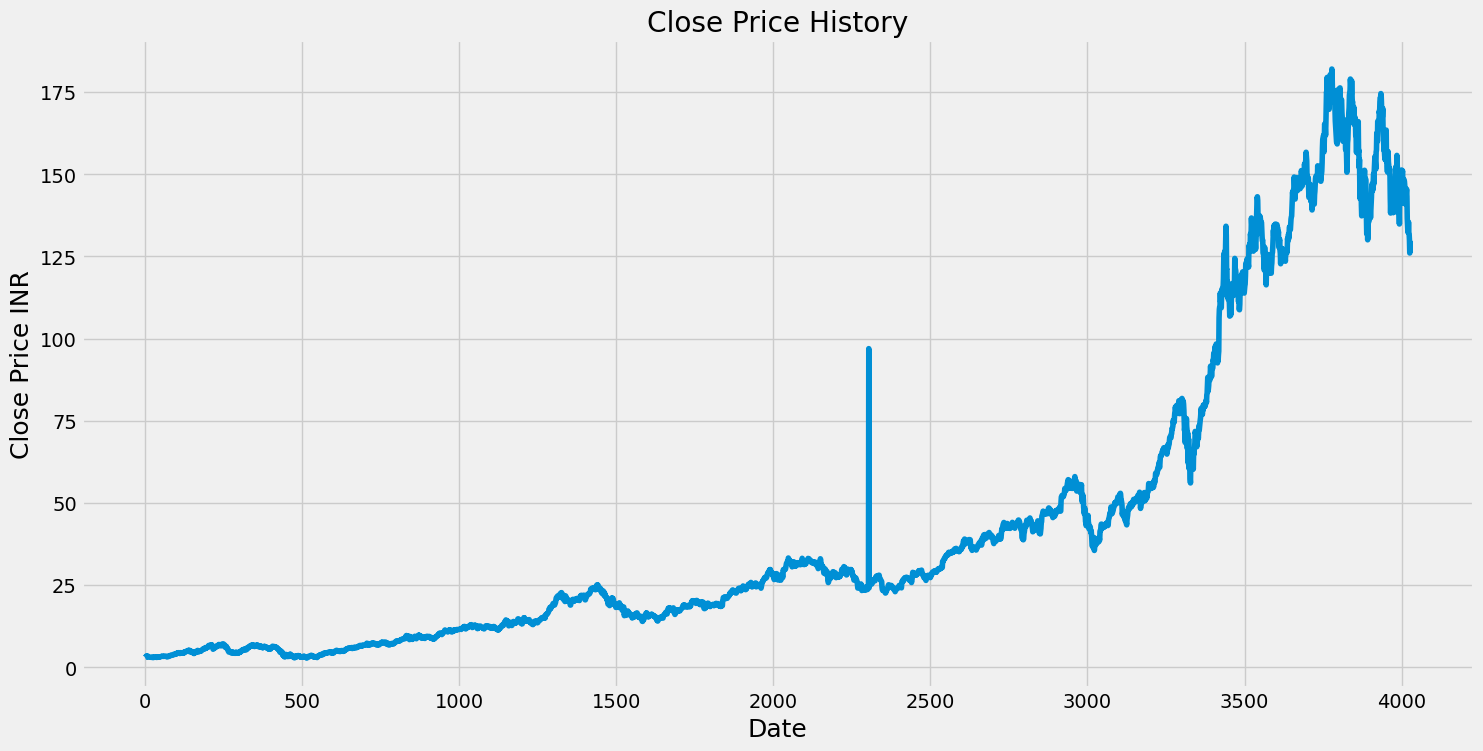

In [6]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Price'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.show()

In [7]:
data=data.filter(['Price'])
dataset=data.values
training_data_len= math.ceil(len(dataset) * .8)

#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.00111595],
       [0.00150653],
       [0.00139493],
       ...,
       [0.68770227],
       [0.70762192],
       [0.70940743]])

In [8]:
#Create training data set

train_data=scaled_data[0:training_data_len,:]

#split the data into x_train and y_train data sets

x_train =[]
y_train=[]

#########################################
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:

    print(x_train)
    print(y_train)
    print()


[array([0.00111595, 0.00150653, 0.00139493, 0.00145073, 0.00290146,
       0.00373842, 0.00351523, 0.00329204, 0.00379422, 0.00334784,
       0.0021761 , 0.0020645 , 0.00172972, 0.00150653, 0.00172972,
       0.00161812, 0.00145073, 0.00156233, 0.00150653, 0.00150653,
       0.00133914, 0.00133914, 0.00117174, 0.00122754, 0.00161812,
       0.00161812, 0.00100435, 0.00133914, 0.00128334, 0.00145073,
       0.00139493, 0.00133914, 0.00156233, 0.00223189, 0.00228769,
       0.0021761 , 0.0021203 , 0.00117174, 0.00128334, 0.00178552,
       0.00145073, 0.00161812, 0.0020087 , 0.00189711, 0.00195291,
       0.00195291, 0.00234349, 0.0020645 , 0.00234349, 0.00228769,
       0.00228769, 0.00256668, 0.00267827, 0.00312465, 0.00318045,
       0.00306885, 0.00351523, 0.00345944, 0.00301306, 0.00312465])]
[0.002957259234460439]



In [9]:
#convert train data to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

#Reshape
x_train.shape

(3164, 60)

In [10]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(3164, 60, 1)

In [11]:
# build LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [13]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

3164/3164 [==============================] - 93s 29ms/step - loss: 2.2441e-04


In [14]:
model.save('keras_model.h5')

In [15]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len - 60:,:]
#create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [16]:
#convert the data to a numpy array
x_test=np.array(x_test)
#reshape
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [17]:
#get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

26/26 [==============================] - 1s 11ms/step


In [18]:
#Get the root mean squared error(RMSE)
rmse=np.sqrt( np.mean((predictions - y_test)**2))
rmse

5.298187239967829

In [21]:
mean_absolute_percentage_error(y_test, predictions)

0.03385954585417171

C:\Users\yaman\AppData\Local\Temp\ipykernel_9424\823980526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


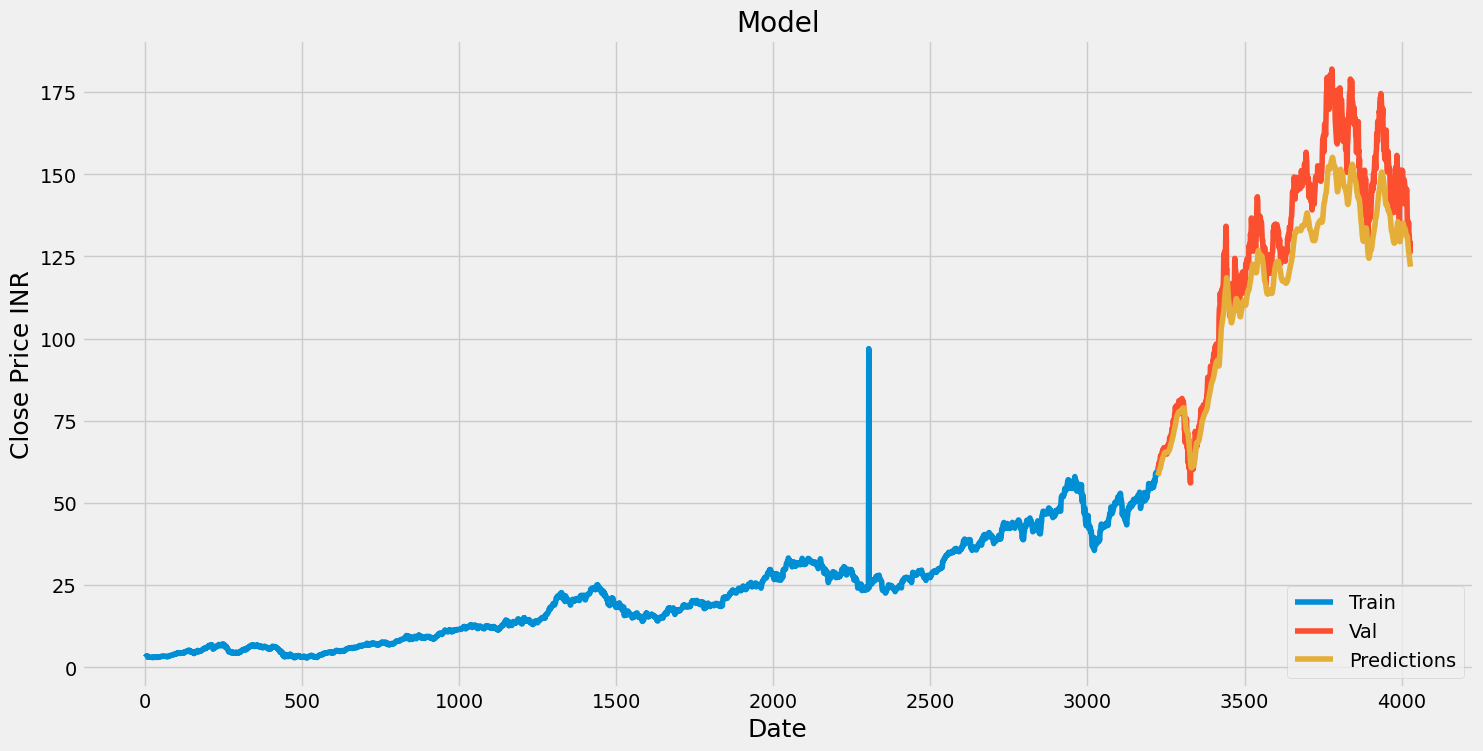

In [40]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.plot(train['Price'])
plt.plot(valid[['Price','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [41]:
#show the valid and predicted prices
valid

,Price,Predictions
3224,59.99,58.289089
3225,60.80,58.572399
3226,60.90,58.902271
3227,61.65,59.229115
3228,62.26,59.596596
...,...,...
4024,131.86,125.248055
4025,130.03,124.505730
4026,126.04,123.707550
4027,129.61,122.606766
